In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st



In [110]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [111]:
cat_school_data = pd.read_csv('cat_school_data.csv', delimiter=';')
num_school_data = pd.read_csv('num_school_data.csv', delimiter=';')
cat_student_data = pd.read_csv('cat_student_data.csv', delimiter=';')
num_student_data = pd.read_csv('num_student_data.csv', delimiter=';')

# Removendo linhas com valores ausentes (NaN) do num_student_data

In [117]:
num_student_data.dropna(inplace=True)

# Removendo as duplicatas dos df

In [137]:
dfcatschool = cat_school_data.drop_duplicates().pivot(index='school', columns='variable', values='value')
dfcatstudent = cat_student_data.drop_duplicates(subset=['school', 'student', 'variable']).pivot(index=['school', 'student'], columns='variable', values='value').fillna('NA')


# Fazendo o pivot para a transformação dos dados para formato mais largo

In [169]:
dfcatschool = cat_school_data.pivot(index='school', columns='variable', values='value')
dfcatstudent = cat_student_data.pivot(index=['school', 'student'], columns='variable', values='value').fillna('NA')

In [170]:
display(dfcatstudent.head())


variable            intake sex       vr
school student                         
1      1        bottom 25%   F  mid 50%
       4           mid 50%   F  mid 50%
       6           mid 50%   M  mid 50%
       7           top 25%   M  mid 50%
       13          mid 50%   M  mid 50%

# garantindo que a coluna student em num_student_data contenha apenas valores numéricos, e remover entradas que não possam ser convertidas para números.


In [150]:
num_student_data['student'] = pd.to_numeric(num_student_data['student'], errors='coerce')
num_student_data.dropna(subset=['student'], inplace=True)


In [151]:
num_student_data.head(10)

,school,student,variable,value
1,1,143.0,normexam,"0,2613242"
2,1,145.0,normexam,"0,1340672"
3,1,142.0,normexam,"-1,723882"
4,1,141.0,normexam,"0,9675862"
5,1,138.0,normexam,"0,5443412"
6,1,155.0,normexam,"1,7348992"
7,1,158.0,normexam,"1,0396082"
8,1,115.0,normexam,"-0,129085"
9,1,117.0,normexam,"-0,939378"
10,1,113.0,normexam,"-1,219486"


# Substituindo a vírgula por ponto 

In [155]:
num_student_data['value'] = num_student_data['value'].astype(str).str.replace(',', '.', regex=False)


In [159]:
num_student_data.head()

,school,student,variable,value
1,1,143.0,normexam,0.2613242
2,1,145.0,normexam,0.1340672
3,1,142.0,normexam,-1.723882
4,1,141.0,normexam,0.9675862
5,1,138.0,normexam,0.5443412


# Removendo caract. não numéricos, exceto o "." na coluna value

In [162]:
num_student_data['value'] = num_student_data['value'].astype(str).str.replace(r'[^\d.]', '', regex=True)

In [163]:
num_student_data.head()

,school,student,variable,value
1,1,143.0,normexam,0.2613242
2,1,145.0,normexam,0.1340672
3,1,142.0,normexam,1.723882
4,1,141.0,normexam,0.9675862
5,1,138.0,normexam,0.5443412


In [171]:
num_student_data['value'] = pd.to_numeric(num_student_data['value'], errors='coerce')


In [166]:
num_student_data.dropna(subset=['value'], inplace=True)


# Agregar num_student_data por escola, aluno e variável, calculando a média do valor 

In [173]:
num_student_agg = num_student_data.groupby(['school', 'student', 'variable'])['value'].mean().reset_index()


In [175]:
num_student_agg.head()

,school,student,variable,value
0,1,1.0,normexam,1.506185
1,1,1.0,standLRT,0.784362
2,1,4.0,normexam,0.555112
3,1,4.0,standLRT,1.033970
4,1,6.0,normexam,1.335315


# Depois de feita a agregação por mean para evitar erros futuros, faremos o pivot para dfnumstudent

In [176]:
dfnumstudent = num_student_agg.pivot(index=['school', 'student'], columns='variable', values='value')


In [177]:
dfnumstudent.head()

variable        normexam  standLRT
school student                    
1      1.0      1.506185  0.784362
       4.0      0.555112  1.033970
       6.0      1.335315  0.951318
       7.0      0.555112  2.356393
       13.0     0.197611  0.290107

# Pivotar num_school_data para criar dfnumschool

In [178]:
dfnumschool = num_school_data.drop_duplicates().pivot(index='school', columns='variable', values='value')


In [179]:
dfnumschool.head()

variable,schavg
school,
1,"0,1661752"
2,"0,3951492"
3,"0,5141552"
4,"0,0917642"
5,"0,2105252"


# Redefinir o índice de dfnumstudent e dfcatstudent

In [180]:
dfnumstudent = dfnumstudent.reset_index()
dfcatstudent = dfcatstudent.reset_index()

# Vamos remover a coluna index caso exista

In [182]:
if 'index' in dfnumstudent.columns:
    dfnumstudent = dfnumstudent.drop(columns=['index'])
if 'index' in dfcatstudent.columns:
    dfcatstudent = dfcatstudent.drop(columns=['index'])

# Unindo os df em colunas específicas 

In [184]:
dfschool = pd.merge(dfnumschool, dfcatschool, on='school', how='inner')
dfstudent = pd.merge(dfnumstudent, dfcatstudent, on=['school', 'student'], how='left')
dfcompleto = pd.merge(dfstudent, dfschool, on='school', how='left')

# Remover linhas ausentes do dfcompleto

In [190]:
dfcompleto.dropna(subset=['student'], inplace=True)


In [193]:
dfcompleto.head(10)

variable,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
0,1,1.0,1.506185,0.784362,bottom 25%,F,mid 50%,"0,1661752",mixed,Mxd
1,1,4.0,0.555112,1.033970,mid 50%,F,mid 50%,"0,1661752",mixed,Mxd
2,1,6.0,1.335315,0.951318,mid 50%,M,mid 50%,"0,1661752",mixed,Mxd
3,1,7.0,0.555112,2.356393,top 25%,M,mid 50%,"0,1661752",mixed,Mxd
4,1,13.0,0.197611,0.290107,mid 50%,M,mid 50%,"0,1661752",mixed,Mxd
5,1,14.0,0.197611,0.040499,mid 50%,M,mid 50%,"0,1661752",mixed,Mxd
6,1,16.0,2.313601,0.784362,bottom 25%,F,mid 50%,"0,1661752",mixed,Mxd
7,1,17.0,0.062088,0.703364,mid 50%,F,mid 50%,"0,1661752",mixed,Mxd
8,1,19.0,0.939378,0.372758,mid 50%,NA,mid 50%,"0,1661752",mixed,Mxd
9,1,22.0,0.478194,0.290107,mid 50%,M,mid 50%,"0,1661752",mixed,Mxd


# Substituindo a string "NULL" por 'NA' nas colunas especificadas


In [194]:
columns_to_replace = ['intake', 'sex', 'vr', 'schgend', 'schavg', 'standLRT', 'normexam', 'type']
for col in columns_to_replace:
    dfcompleto[col] = dfcompleto[col].astype(str).str.replace('NULL', 'NA', regex=False)

# Removendo as linhas especificadas que contenha 'NA'

In [195]:
dfcompleto = dfcompleto[~dfcompleto[columns_to_replace].isin(['NA']).any(axis=1)]


# Convertendo as colunas para numérico

In [200]:
dfcompleto.loc[:, 'normexam'] = pd.to_numeric(dfcompleto['normexam'], errors='coerce')
dfcompleto.loc[:, 'standLRT'] = pd.to_numeric(dfcompleto['standLRT'], errors='coerce')
dfcompleto.loc[:, 'schavg'] = pd.to_numeric(dfcompleto['schavg'].astype(str).str.replace(',', '.', regex=False), errors='coerce')

# Convertendo colunas para string 

In [202]:
dfcompleto.loc[:, 'sex'] = dfcompleto['sex'].astype(str)
dfcompleto.loc[:, 'intake'] = dfcompleto['intake'].astype(str)
dfcompleto.loc[:, 'vr'] = dfcompleto['vr'].astype(str)

In [205]:
dfcompleto.head(10)

variable,school,student,normexam,standLRT,intake,sex,vr,schavg,schgend,type
0,1,1.0,1.506185,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
1,1,4.0,0.555112,1.033970,mid 50%,F,mid 50%,0.166175,mixed,Mxd
2,1,6.0,1.335315,0.951318,mid 50%,M,mid 50%,0.166175,mixed,Mxd
3,1,7.0,0.555112,2.356393,top 25%,M,mid 50%,0.166175,mixed,Mxd
4,1,13.0,0.197611,0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd
5,1,14.0,0.197611,0.040499,mid 50%,M,mid 50%,0.166175,mixed,Mxd
6,1,16.0,2.313601,0.784362,bottom 25%,F,mid 50%,0.166175,mixed,Mxd
7,1,17.0,0.062088,0.703364,mid 50%,F,mid 50%,0.166175,mixed,Mxd
9,1,22.0,0.478194,0.290107,mid 50%,M,mid 50%,0.166175,mixed,Mxd
10,1,27.0,0.134067,0.123150,mid 50%,M,mid 50%,0.166175,mixed,Mxd


In [221]:
print(dfcompleto.describe().to_markdown(numalign="left", stralign="left"))


|       | school   | student   | normexam   | standLRT   | schavg     |
|:------|:---------|:----------|:-----------|:-----------|:-----------|
| count | 3799     | 3799      | 3734       | 3772       | 3799       |
| mean  | 30.7799  | 133.778   | 0.795463   | 0.779112   | 0.00301363 |
| std   | 18.9147  | 172.631   | 0.602434   | 0.608325   | 0.315579   |
| min   | 1        | 1         | 0.0043222  | 0.0404992  | -0.755961  |
| 25%   | 14       | 39        | 0.328072   | 0.290107   | -0.149341  |
| 50%   | 28       | 78        | 0.678759   | 0.620713   | -0.01305   |
| 75%   | 47       | 138       | 1.11862    | 1.11662    | 0.267385   |
| max   | 65       | 913       | 3.66609    | 3.01595    | 0.637656   |


# resumo estatístico das colunas categóricas

In [226]:
summary_categorical = dfcompleto.describe(include=['object'])

In [274]:
summary_categorical

variable,intake,sex,vr,schgend,type
count,3799,3799,3799,3799,3799
unique,3,2,3,3,2
top,mid 50%,F,mid 50%,mixed,Mxd
freq,2213,2278,2111,2033,2033


# Tabela descritiva formatada

In [277]:
formatted_descriptive_table = dfcompleto.describe().to_markdown(
    numalign="left", stralign="left", floatfmt=".2f"  
)
print(formatted_descriptive_table)


|       | school   | student   | normexam   | standLRT   | schavg   |
|:------|:---------|:----------|:-----------|:-----------|:---------|
| count | 3799.00  | 3799.00   | 3734.00    | 3772.00    | 3799.00  |
| mean  | 30.78    | 133.78    | 0.80       | 0.78       | 0.00     |
| std   | 18.91    | 172.63    | 0.60       | 0.61       | 0.32     |
| min   | 1.00     | 1.00      | 0.00       | 0.04       | -0.76    |
| 25%   | 14.00    | 39.00     | 0.33       | 0.29       | -0.15    |
| 50%   | 28.00    | 78.00     | 0.68       | 0.62       | -0.01    |
| 75%   | 47.00    | 138.00    | 1.12       | 1.12       | 0.27     |
| max   | 65.00    | 913.00    | 3.67       | 3.02       | 0.64     |


-------------------------------------- análise ------------------------------------------------------------------

In [278]:
dfcompleto.loc[:, 'normexam'] = pd.to_numeric(dfcompleto.loc[:, 'normexam'], errors='coerce')


C:\Users\hiago\AppData\Local\Temp\ipykernel_25624\665410926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schgend', y='normexam', data=dfcompleto, palette='pastel')


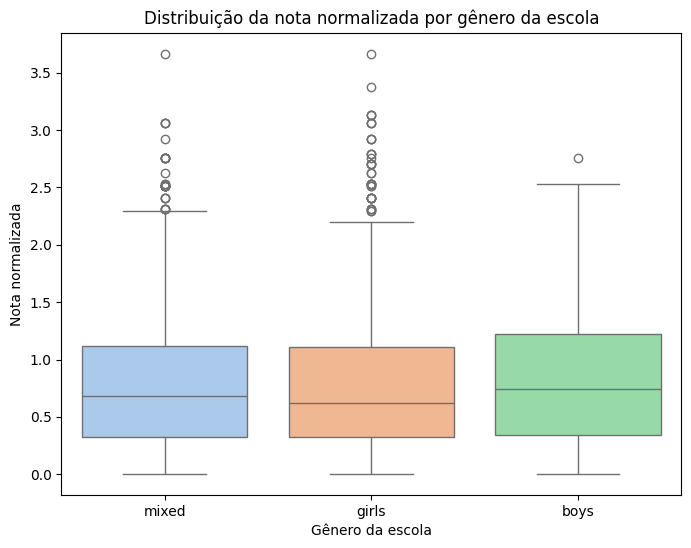

In [279]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='schgend', y='normexam', data=dfcompleto, palette='pastel')
plt.title('Distribuição da nota normalizada por gênero da escola')
plt.xlabel('Gênero da escola')
plt.ylabel('Nota normalizada')
plt.show()

C:\Users\hiago\AppData\Local\Temp\ipykernel_25624\1886282414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schgend', y='normexam', data=dfcompleto, palette='pastel')


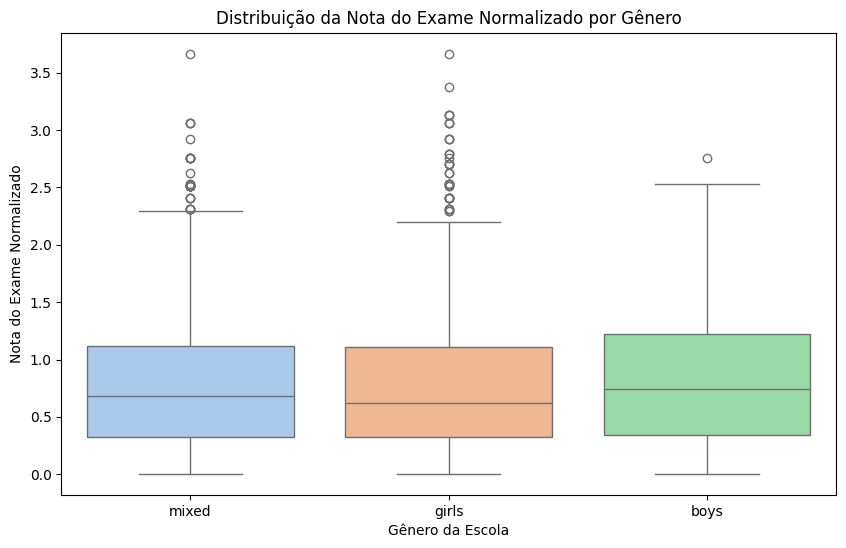

In [252]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='schgend', y='normexam', data=dfcompleto, palette='pastel')
plt.title('Distribuição da Nota do Exame Normalizado por Gênero')
plt.xlabel('Gênero da Escola')
plt.ylabel('Nota do Exame Normalizado')
plt.show()


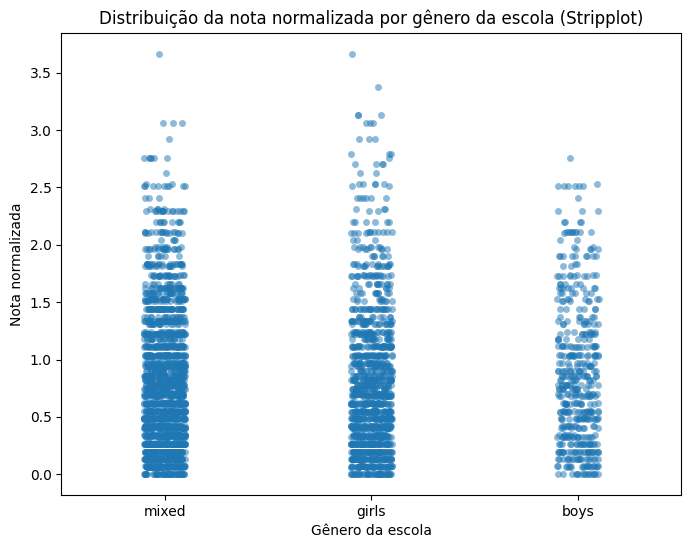

In [259]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='schgend', y='normexam', data=dfcompleto, jitter=True, alpha=0.5)
plt.title('Distribuição da nota normalizada por gênero da escola (Stripplot)')
plt.xlabel('Gênero da escola')
plt.ylabel('Nota normalizada')
plt.show()


In [260]:
summary_stats = dfcompleto.groupby('schgend')['normexam'].describe()


In [261]:
print(summary_stats)


          count      mean       std       min       25%       50%       75%  \
schgend                                                                       
boys      477.0  0.860477  0.620238  0.004322  0.338842  0.747228  1.219486   
girls    1262.0  0.779701  0.619204  0.004322  0.328072  0.623051  1.109438   
mixed    1995.0  0.789890  0.586463  0.004322  0.328072  0.678759  1.118624   

              max  
schgend            
boys     2.752660  
girls    3.666091  
mixed    3.666072  


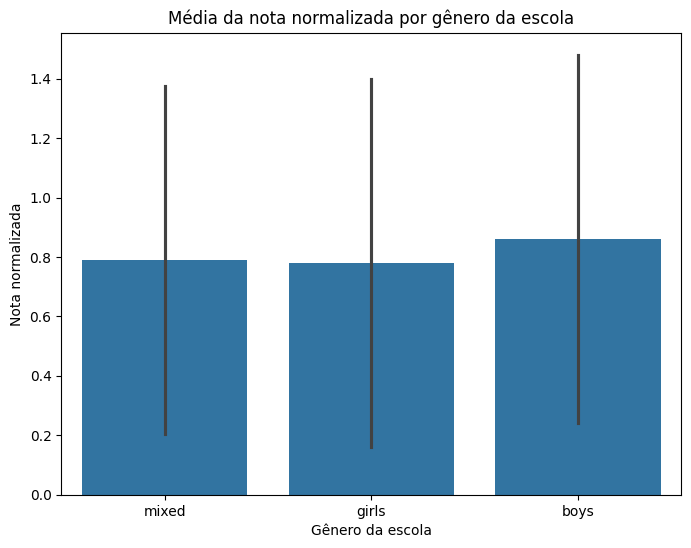

In [262]:
plt.figure(figsize=(8, 6))
sns.barplot(x='schgend', y='normexam', data=dfcompleto, errorbar='sd')  # errorbar='sd' mostra o desvio padrão
plt.title('Média da nota normalizada por gênero da escola')
plt.xlabel('Gênero da escola')
plt.ylabel('Nota normalizada')
plt.show()


Column: intake
| frequency   | count   |
|:------------|:--------|
| mid 50%     | 2213    |
| bottom 25%  | 1086    |
| top 25%     | 500     |


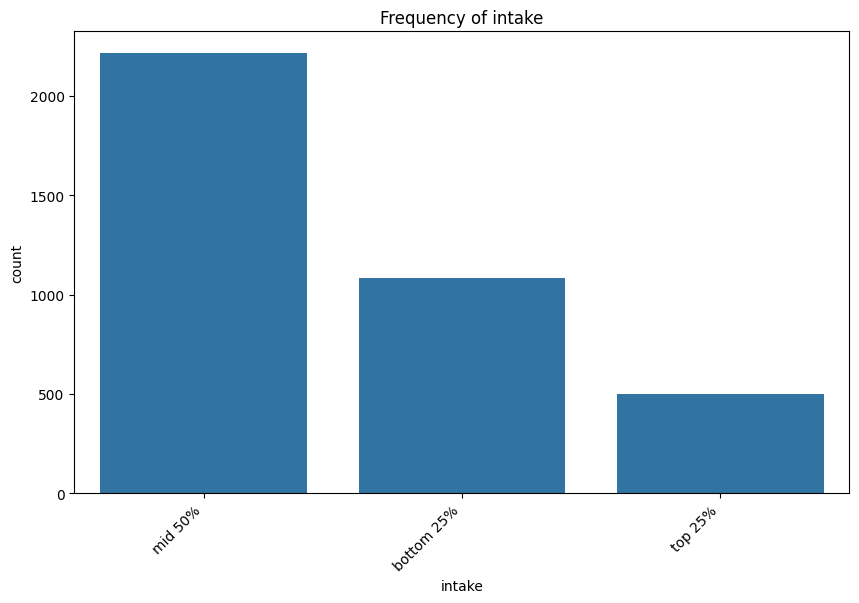


Column: sex
| frequency   | count   |
|:------------|:--------|
| F           | 2278    |
| M           | 1521    |


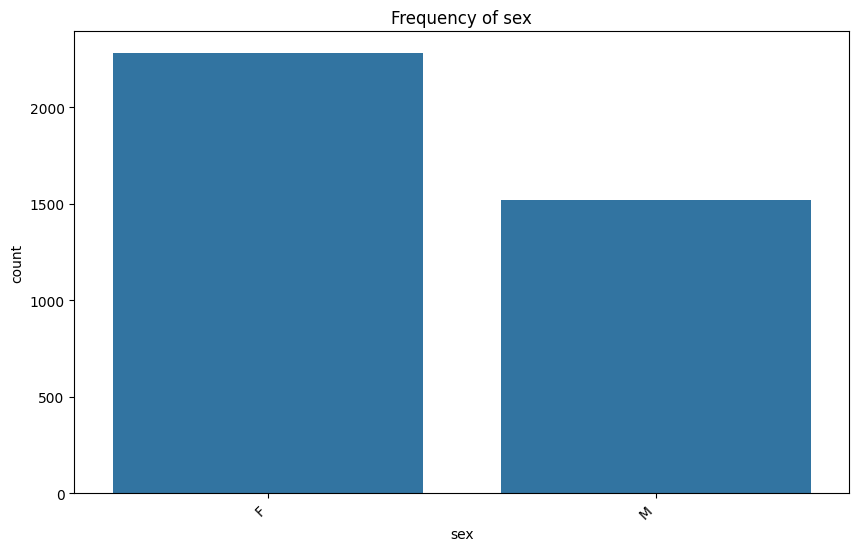


Column: vr
| frequency   | count   |
|:------------|:--------|
| mid 50%     | 2111    |
| top 25%     | 1088    |
| bottom 25%  | 600     |


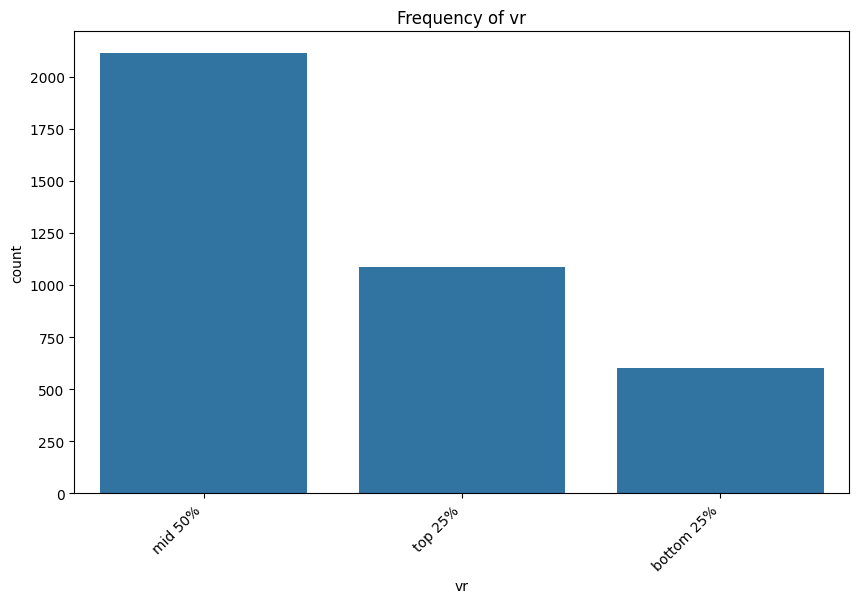


Column: schgend
| frequency   | count   |
|:------------|:--------|
| mixed       | 2033    |
| girls       | 1286    |
| boys        | 480     |


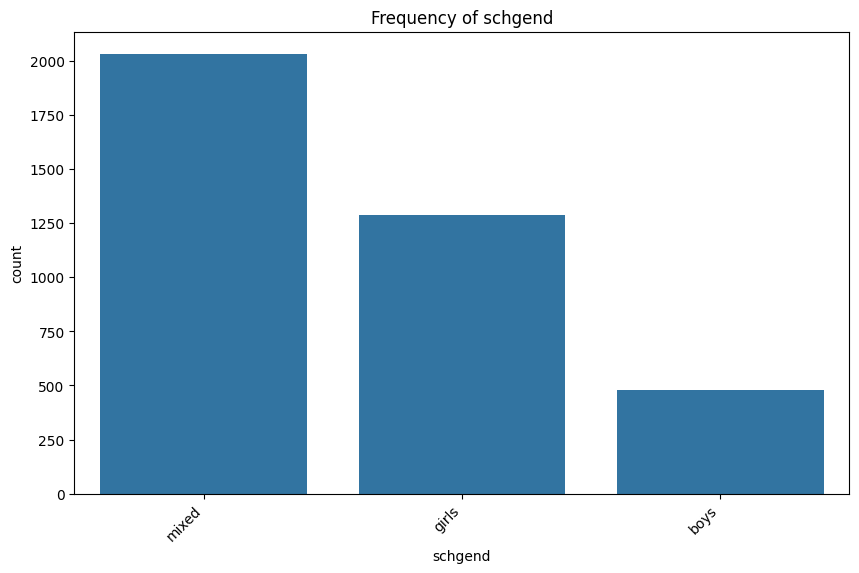


Column: type
| frequency   | count   |
|:------------|:--------|
| Mxd         | 2033    |
| Sngl        | 1766    |


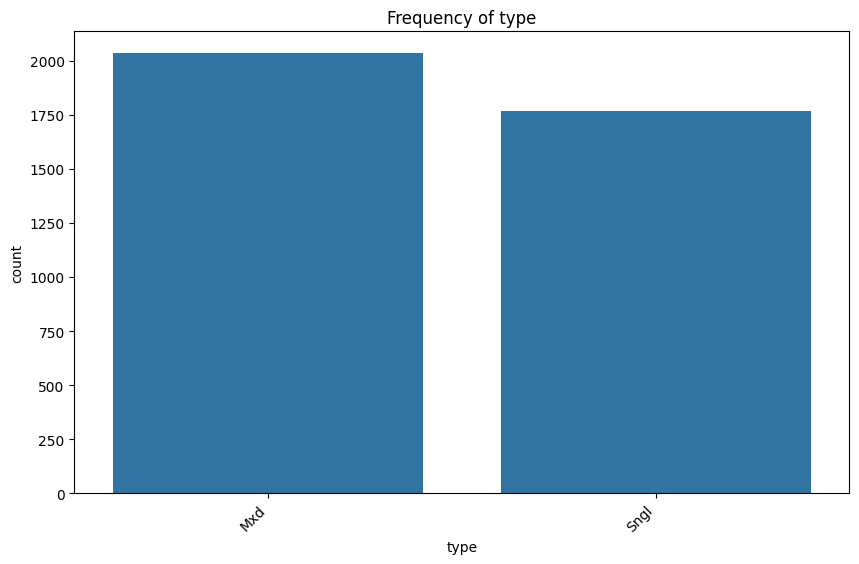

In [236]:
categorical_cols = dfcompleto.select_dtypes(include=['object'])

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(dfcompleto[col].value_counts().reset_index().rename(columns={'index': col, col: 'frequency'}).to_markdown(index=False, numalign='left', stralign='left'))

    plt.figure(figsize=(10, 6))
    sns.countplot(data=dfcompleto, x=col, order=dfcompleto[col].value_counts().index)
    plt.xticks(rotation=45, ha="right")
    plt.title(f'Frequency of {col}')
    plt.show()
